In [35]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv("student1.csv")


In [37]:
df.head()


,student_hours,student_marks
0,1.0,30
1,4.0,60
2,3.0,50
3,4.0,60
4,5.0,70


In [38]:
df.tail()

,student_hours,student_marks
7,8.0,85
8,9.0,90
9,2.5,45
10,5.6,65
11,9.8,95


In [39]:
df.shape

(12, 2)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_hours  12 non-null     float64
 1   student_marks  12 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


In [41]:
df.describe()

,student_hours,student_marks
count,12.000000,12.000000
mean,5.408333,67.666667
std,2.690880,19.722315
min,1.000000,30.000000
25%,3.750000,57.500000
50%,5.300000,67.500000
75%,7.250000,82.750000
max,9.800000,95.000000


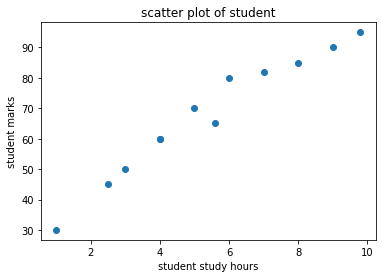

In [42]:
plt.scatter(x= df.student_hours, y = df.student_marks)
plt.xlabel("student study hours")
plt.ylabel("student marks")
plt.title("scatter plot of student")
plt.show()

In [43]:
df.head()

,student_hours,student_marks
0,1.0,30
1,4.0,60
2,3.0,50
3,4.0,60
4,5.0,70


In [44]:
df.tail()

,student_hours,student_marks
7,8.0,85
8,9.0,90
9,2.5,45
10,5.6,65
11,9.8,95


In [45]:
df.isnull()

,student_hours,student_marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [46]:
df.mean()

student_hours     5.408333
student_marks    67.666667
dtype: float64

In [47]:
df2=df.fillna(df.mean())

In [48]:
df2.isnull().sum()

student_hours    0
student_marks    0
dtype: int64

SPLIT DATAFRAME

In [49]:
x=df.drop("student_marks", axis="columns")
y=df.drop("student_hours", axis="columns")
print("shape of x=",x.shape)
print("shape of y=" ,y.shape)

shape of x= (12, 1)
shape of y= (12, 1)


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=51)
print("shape of x_train=",x_train.shape)
print("shape of y_train=",y_train.shape)
print("shape of x_test=",x_test.shape)
print("shape of y_test=",y_test.shape)

shape of x_train= (9, 1)
shape of y_train= (9, 1)
shape of x_test= (3, 1)
shape of y_test= (3, 1)


SELECT A MODEL AND TRAIN IT

In [51]:
#y=m*x+c
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
lr.coef_

array([[7.24163874]])

In [54]:
lr.intercept_

array([28.40469188])

In [55]:
m=7.41
c=26.86
y=m*4+c
y

56.5

In [56]:
lr.predict([[4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[57.37124684]])

In [57]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


57.37

In [58]:
y_pred=lr.predict(x_test)
y_pred

array([[57.37124684],
       [86.33780179],
       [50.1296081 ]])

In [59]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,4.0,60.0,57.371247
1,8.0,85.0,86.337802
2,3.0,50.0,50.129608


Fine tune your model

In [60]:
lr.score(x_test,y_test)

0.9865894537124327

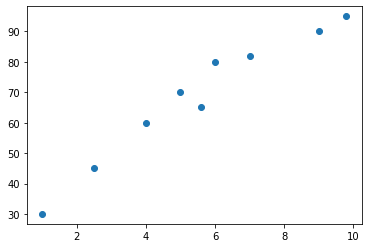

In [61]:
plt.scatter(x_train,y_train)

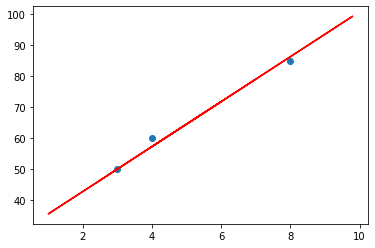

In [62]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="r")

PRESENT SOLUTION

save MI model

In [63]:
import joblib
joblib.dump(lr,"Student_mark_Predictor_model.pk1")

['Student_mark_Predictor_model.pk1']

In [64]:
model=joblib.load("Student_mark_Predictor_model.pk1")

In [65]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


64.61288557554204

LAUNCH MODEL

In [66]:
model.predict([[10.3]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


102.99357089118394

In [67]:
model.predict([[8]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


86.3378017919431

In [68]:
model.predict([[4]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


57.371246836741676